In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [208]:
data = pd.read_csv("full_data.csv")

In [209]:
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
data.tail(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


## Statistics 

In [5]:
data.shape

(4981, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
data[['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


## Visulization 

<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

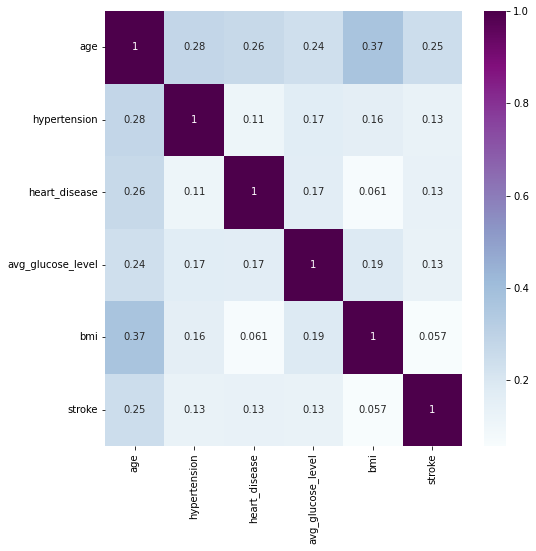

In [9]:
corr_matrix=data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,cmap = "BuPu" ,annot=True)
plt.show()


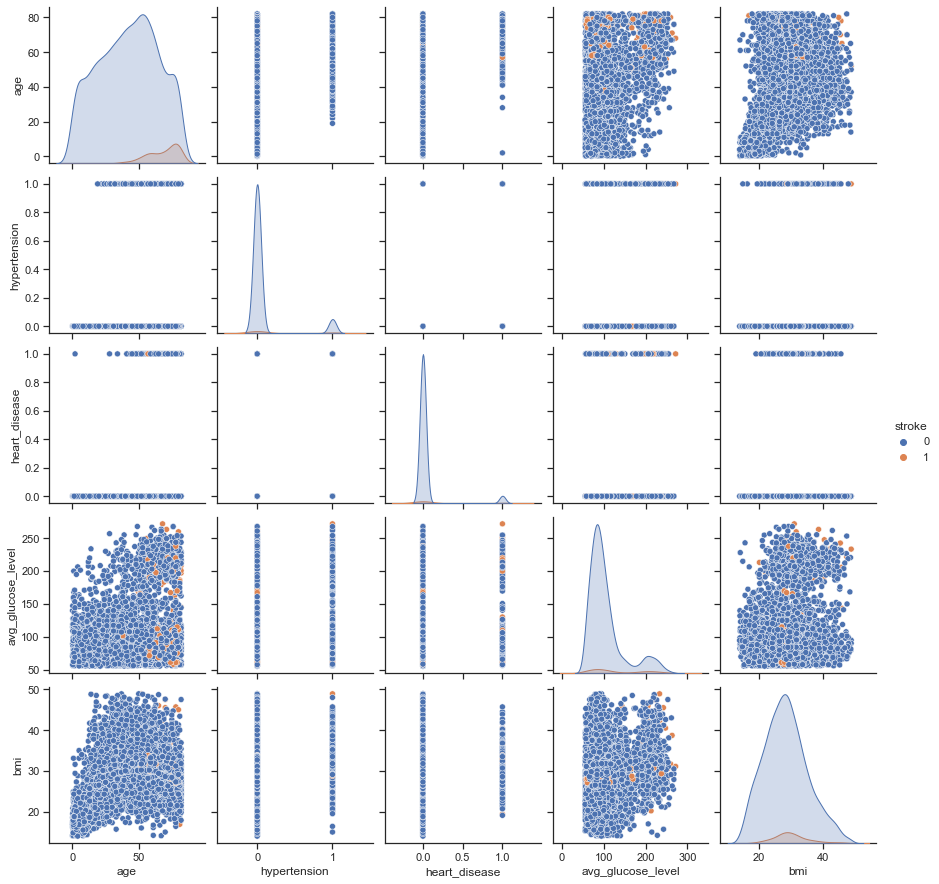

In [269]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=data,hue='stroke',dropna=True,height=2.5,diag_kind="kde",)


## Gender

<AxesSubplot:xlabel='stroke', ylabel='age'>

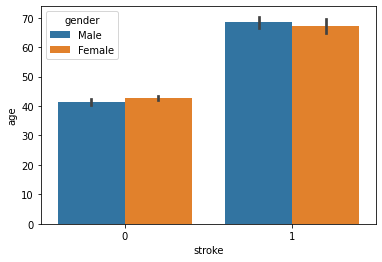

In [216]:

 sns.barplot(x='stroke',y='age',hue='gender',data=data)

## Smoking

In [257]:
print(data['smoking_status'].unique())
for_smoke=data.replace({'smoking_status':{'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':3}})
for_smoke.head(3)



['formerly smoked' 'never smoked' 'smokes' 'Unknown']


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,0,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,2,1


/Users/rakeshbadgujar/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/rakeshbadgujar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x7fbf0381db20>,
 [Text(0, 0, 'formerly smoked'),
  Text(1, 0, 'never smoked'),
  Text(2, 0, 'smokes'),
  Text(3, 0, 'Unknown')])

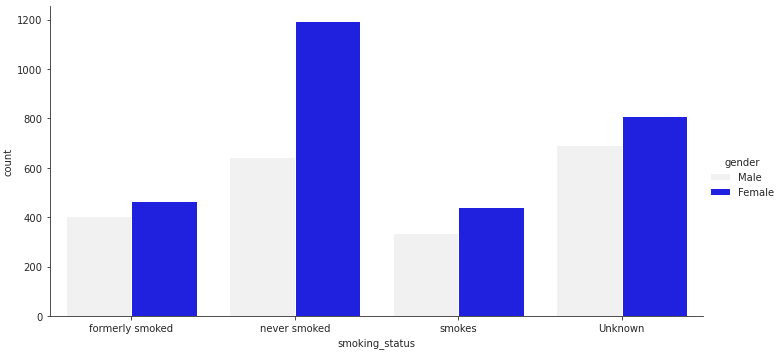

In [255]:
with sns.axes_style('ticks'):
    g = sns.factorplot("smoking_status", data=for_smoke, aspect=2,
                       kind="count", color='blue',hue = 'gender')
    g.set_xticklabels(step=5)
    plt.xticks([0, 1, 2,3],['formerly smoked', 'never smoked' ,'smokes', 'Unknown'])

##  Visulization for average glucose level

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

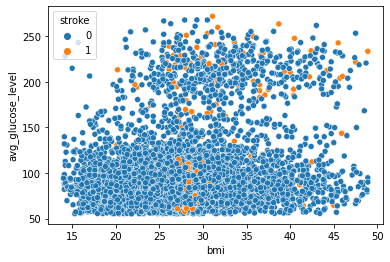

In [263]:
sns.scatterplot(x="bmi",
                    y="avg_glucose_level",
                    hue="stroke",
                    data=data)

## Data pre-prpcessing

In [40]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [72]:
df_non_stroke= data[data.stroke==0].copy()
len(df_non_stroke)

df_non_stroke.head()

4733

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
208,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
209,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
210,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
211,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
212,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0


In [63]:
df_stroke=data[data.stroke==1]
df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4815,Male,79.0,0,0,Yes,Private,Rural,114.77,27.2,formerly smoked,1
4816,Male,74.0,0,0,Yes,Private,Urban,167.13,28.7,Unknown,1
4817,Female,76.0,1,1,Yes,Self-employed,Urban,199.86,31.7,smokes,1
4818,Male,74.0,0,0,Yes,Self-employed,Rural,60.98,28.1,never smoked,1


In [73]:
df_sampled  = df_non_stroke.sample(frac=0.07)
len(df_sampled)
df_sampled.head()

331

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
529,Male,57.0,0,0,Yes,Private,Urban,108.53,19.4,smokes,0
3955,Female,65.0,0,0,Yes,Self-employed,Urban,248.24,27.0,smokes,0
3018,Female,17.0,0,0,No,Private,Urban,89.58,22.8,Unknown,0
2781,Female,35.0,0,0,Yes,Private,Urban,80.76,28.8,smokes,0
2069,Female,1.0,0,0,No,children,Urban,199.83,24.5,Unknown,0


In [81]:

new_data = pd.concat([df_sampled,df_stroke],axis=0)
new_data['stroke'].nunique()
new_data.isnull().sum()
new_data.head(100)

2

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
529,Male,57.0,0,0,Yes,Private,Urban,108.53,19.4,smokes,0
3955,Female,65.0,0,0,Yes,Self-employed,Urban,248.24,27.0,smokes,0
3018,Female,17.0,0,0,No,Private,Urban,89.58,22.8,Unknown,0
2781,Female,35.0,0,0,Yes,Private,Urban,80.76,28.8,smokes,0
2069,Female,1.0,0,0,No,children,Urban,199.83,24.5,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
2081,Female,55.0,0,0,Yes,Private,Urban,57.30,41.5,never smoked,0
1495,Female,20.0,0,0,No,Private,Urban,73.83,16.6,Unknown,0
922,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
2148,Female,63.0,0,0,Yes,Self-employed,Urban,65.71,29.2,smokes,0


In [82]:
shuffled = shuffle(new_data,random_state=1)
shuffled.head()
shuffled.describe()
shuffled['stroke'].nunique()
shuffled.isnull().sum()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3141,Male,11.0,0,0,No,children,Rural,87.54,24.4,Unknown,0
88,Female,50.0,1,0,Yes,Private,Rural,73.18,30.3,formerly smoked,1
19,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
79,Female,70.0,0,0,Yes,Self-employed,Rural,76.34,24.4,formerly smoked,1
149,Male,61.0,1,1,Yes,Private,Urban,112.24,37.4,smokes,1


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,53.315164,0.172712,0.096718,116.614266,29.099482,0.428325
std,22.937944,0.378325,0.295830,53.476924,6.529180,0.495264
min,0.240000,0.000000,0.000000,55.410000,14.100000,0.000000
25%,38.000000,0.000000,0.000000,78.865000,24.600000,0.000000
50%,58.000000,0.000000,0.000000,95.890000,28.700000,0.000000
75%,74.000000,0.000000,0.000000,133.385000,32.500000,1.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


2

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [87]:

shuffled['Residence_type'].nunique()
shuffled['work_type'].nunique()

2

4

In [88]:
categorical  =["gender","ever_married","work_type","Residence_type","smoking_status","hypertension","heart_disease"]
categorical
num = ["age","avg_glucose_level","bmi"]
num

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'hypertension',
 'heart_disease']

['age', 'avg_glucose_level', 'bmi']

In [89]:
shuffled = pd.get_dummies(shuffled, columns = categorical, drop_first = True)
shuffled.head(5)


,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_1,heart_disease_1
3141,11.0,87.54,24.4,0,1,0,0,0,1,0,0,0,0,0,0
88,50.0,73.18,30.3,1,0,1,1,0,0,0,1,0,0,1,0
19,82.0,208.30,32.5,1,1,1,1,0,0,0,0,0,0,0,1
79,70.0,76.34,24.4,1,0,1,0,1,0,0,1,0,0,0,0
149,61.0,112.24,37.4,1,1,1,1,0,0,1,0,0,1,1,1


In [111]:

X = shuffled.drop(['stroke'],axis=1)
y = shuffled[['stroke']]
y = y.values.ravel()


In [112]:
scalar = RobustScaler()
X[num]=scalar.fit_transform(X[num])
X.head()

,age,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_1,heart_disease_1
3141,-1.305556,-0.153155,-0.544304,1,0,0,0,1,0,0,0,0,0,0
88,-0.222222,-0.416544,0.202532,0,1,1,0,0,0,1,0,0,1,0
19,0.666667,2.061812,0.481013,1,1,1,0,0,0,0,0,0,0,1
79,0.333333,-0.358584,-0.544304,0,1,0,1,0,0,1,0,0,0,0
149,0.083333,0.299890,1.101266,1,1,1,0,0,1,0,0,1,1,1


In [113]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.33)


## Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [57]:
len(y_train)
y_train[1:100]
y_train.nunique()

3392

,stroke
2811,0
3313,0
473,0
1270,0
4913,0
...,...
2302,0
2582,0
1355,0
358,0


stroke    1
dtype: int64

In [114]:
LogReg=LogisticRegression()

 
model_LogReg = LogReg.fit(X_train,y_train)
model_LogReg
y_pred = LogReg.predict(X_test)
y_pred


LogisticRegression()

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [115]:
log_matrix = metrics.confusion_matrix(y_test, y_pred)
log_matrix

array([[91, 20],
       [20, 61]])

In [119]:
Target_value_name = ['non-stroke','stroke']
print(classification_report(y_test, y_pred,target_names=Target_value_name))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  non-stroke       0.82      0.82      0.82       111
      stroke       0.75      0.75      0.75        81

    accuracy                           0.79       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.79      0.79      0.79       192

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       111
           1       0.75      0.75      0.75        81

    accuracy                           0.79       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.79      0.79      0.79       192



In [123]:
scores = cross_val_score(LogReg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.61538462 0.69230769 0.64102564 0.82051282 0.76923077 0.82051282
 0.74358974 0.76315789 0.63157895 0.84210526]


In [124]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.6153846153846154, 0.733940620782726, 0.8421052631578947)

## Decision Tree Classifier

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [165]:
tree_gini=DecisionTreeClassifier(criterion = "gini",max_depth = 3,min_samples_leaf = 3,random_state = 100 )

In [166]:
model_tree_gini= tree_gini.fit(X_train,y_train)
pred_tree_gini=tree_gini.predict(X_test)

In [167]:
print(accuracy_score(y_test, pred_tree_gini))

0.7916666666666666


In [169]:
tree_entropy=DecisionTreeClassifier(criterion = "entropy",max_depth = 3,min_samples_leaf = 3,random_state = 100 )
model_entropy= tree_entropy.fit(X_train,y_train)
pred_entropy=tree_entropy.predict(X_test)
print(accuracy_score(y_test, pred_entropy))

0.78125


In [170]:
print ("Report : ",  classification_report(y_test, pred_tree_gini))
print ("Report : ",  classification_report(y_test, pred_entropy))

Report :                precision    recall  f1-score   support

           0       0.85      0.77      0.81       111
           1       0.73      0.81      0.77        81

    accuracy                           0.79       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.80      0.79      0.79       192

Report :                precision    recall  f1-score   support

           0       0.88      0.72      0.79       111
           1       0.69      0.86      0.77        81

    accuracy                           0.78       192
   macro avg       0.79      0.79      0.78       192
weighted avg       0.80      0.78      0.78       192



[Text(465.0, 792.75, 'X[0] <= -0.042\ngini = 0.491\nsamples = 387\nvalue = [220, 167]'),
 Text(232.5, 566.25, 'X[0] <= -0.569\ngini = 0.271\nsamples = 173\nvalue = [145, 28]'),
 Text(116.25, 339.75, 'X[1] <= -0.36\ngini = 0.066\nsamples = 88\nvalue = [85, 3]'),
 Text(58.125, 113.25, 'gini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(174.375, 113.25, 'gini = 0.0\nsamples = 70\nvalue = [70, 0]'),
 Text(348.75, 339.75, 'X[2] <= 0.348\ngini = 0.415\nsamples = 85\nvalue = [60, 25]'),
 Text(290.625, 113.25, 'gini = 0.483\nsamples = 49\nvalue = [29, 20]'),
 Text(406.875, 113.25, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(697.5, 566.25, 'X[0] <= 0.264\ngini = 0.455\nsamples = 214\nvalue = [75, 139]'),
 Text(581.25, 339.75, 'X[10] <= 0.5\ngini = 0.5\nsamples = 80\nvalue = [40, 40]'),
 Text(523.125, 113.25, 'gini = 0.474\nsamples = 57\nvalue = [22, 35]'),
 Text(639.375, 113.25, 'gini = 0.34\nsamples = 23\nvalue = [18, 5]'),
 Text(813.75, 339.75, 'X[1] <= 0.002\ngini = 0.386\nsample

Text(0.5, 1.0, 'Plot for Gini Index')

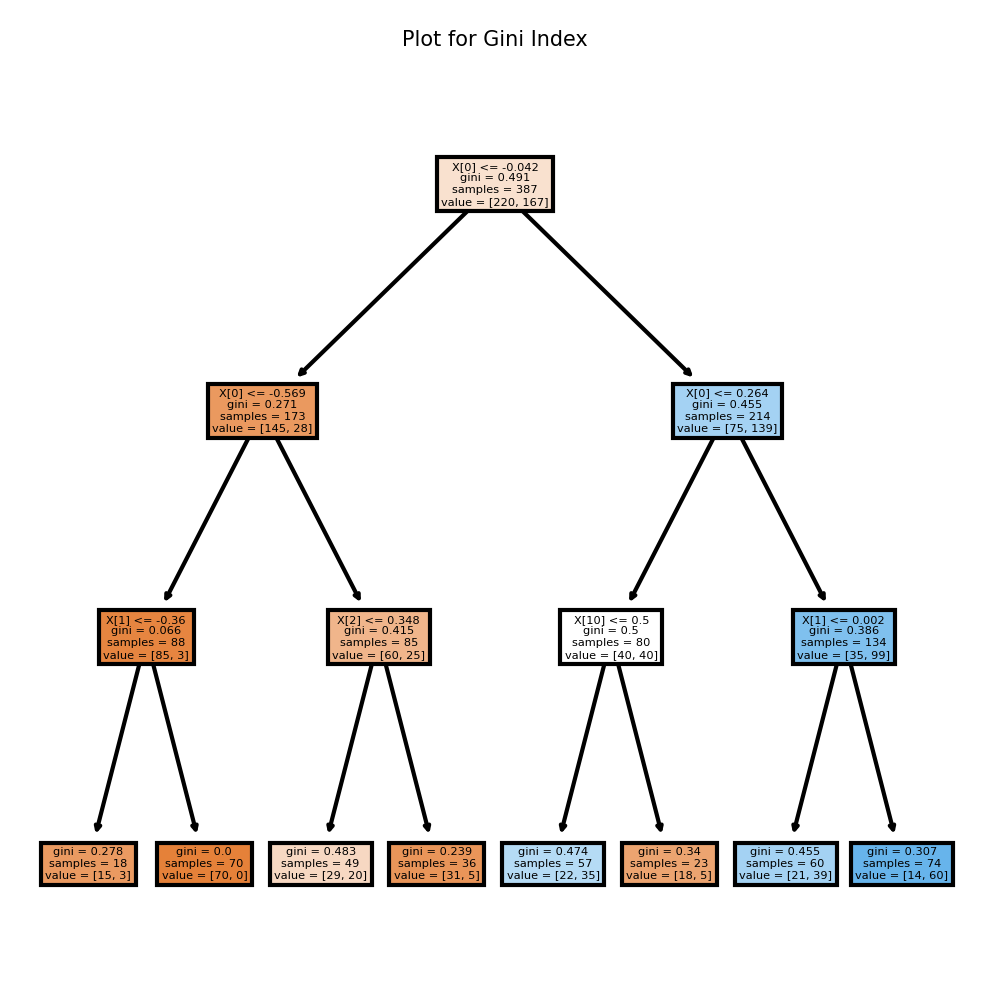

In [176]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_tree_gini,filled = True)
plt.title("Plot for Gini Index",fontsize=5)

[Text(465.0, 792.75, 'X[0] <= -0.208\nentropy = 0.986\nsamples = 387\nvalue = [220, 167]'),
 Text(232.5, 566.25, 'X[0] <= -0.569\nentropy = 0.526\nsamples = 143\nvalue = [126, 17]'),
 Text(116.25, 339.75, 'X[1] <= -0.36\nentropy = 0.215\nsamples = 88\nvalue = [85, 3]'),
 Text(58.125, 113.25, 'entropy = 0.65\nsamples = 18\nvalue = [15, 3]'),
 Text(174.375, 113.25, 'entropy = 0.0\nsamples = 70\nvalue = [70, 0]'),
 Text(348.75, 339.75, 'X[2] <= 0.348\nentropy = 0.818\nsamples = 55\nvalue = [41, 14]'),
 Text(290.625, 113.25, 'entropy = 0.963\nsamples = 31\nvalue = [19, 12]'),
 Text(406.875, 113.25, 'entropy = 0.414\nsamples = 24\nvalue = [22, 2]'),
 Text(697.5, 566.25, 'X[0] <= 0.264\nentropy = 0.962\nsamples = 244\nvalue = [94, 150]'),
 Text(581.25, 339.75, 'X[10] <= 0.5\nentropy = 0.996\nsamples = 110\nvalue = [59, 51]'),
 Text(523.125, 113.25, 'entropy = 0.992\nsamples = 74\nvalue = [33, 41]'),
 Text(639.375, 113.25, 'entropy = 0.852\nsamples = 36\nvalue = [26, 10]'),
 Text(813.75, 339.

Text(0.5, 1.0, 'Plot for Entropy ')

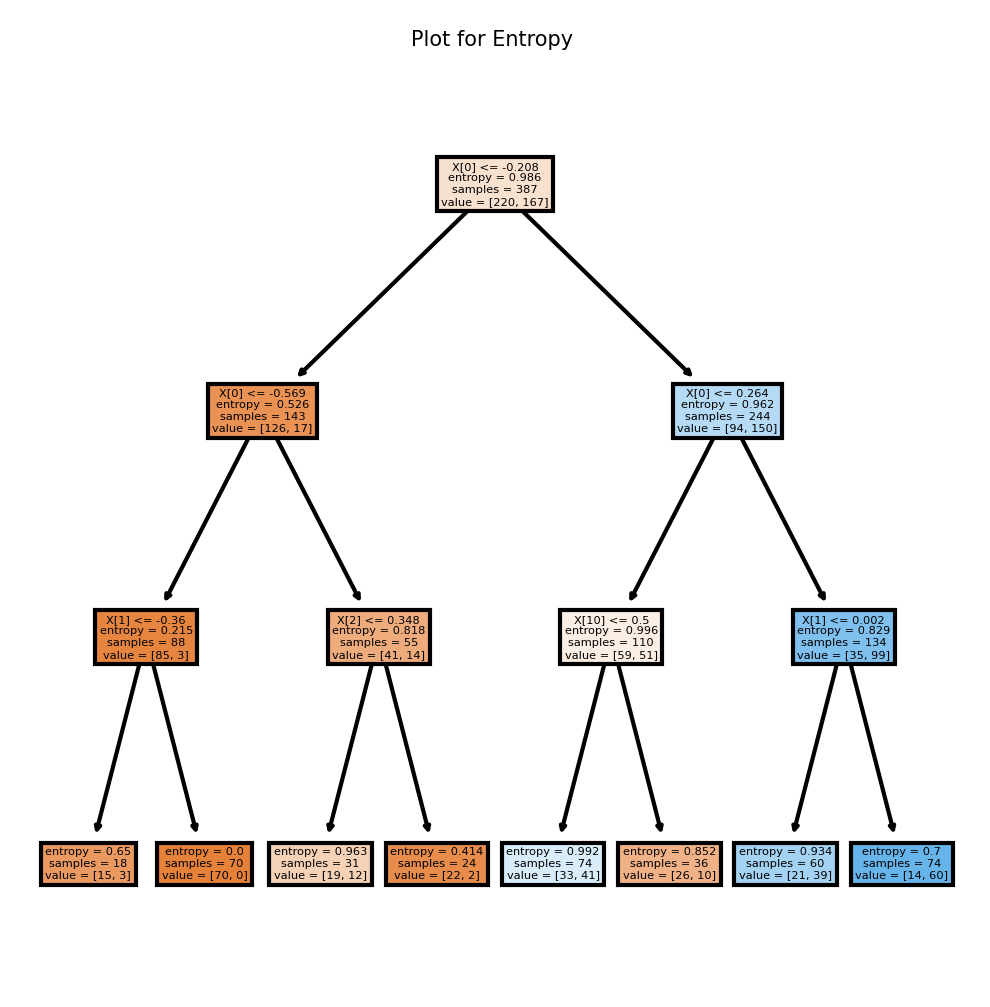

In [182]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_entropy,filled = True)
plt.title("Plot for Entropy ",fontsize=5)


## Support Vector Machine

In [197]:
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs




In [191]:
SVM_linear = SVC(kernel='linear') 
Model_SVM_linear = SVM_linear.fit(X_train,y_train)
SVM_linear_pred = SVM_linear.predict(X_test)
confusion_matrix(y_test, SVM_linear_pred)

array([[90, 21],
       [22, 59]])

In [198]:
support_vector_indices = SVM_linear.support_


[  0   3   6  11  13  15  16  17  23  29  38  39  42  53  56  60  61  63
  66  67  69  75  84  85  96 100 101 102 103 105 107 109 113 115 116 117
 130 138 145 147 150 154 156 160 163 174 176 177 183 190 196 197 199 203
 205 206 207 218 219 221 222 235 236 240 244 246 247 248 252 253 255 258
 259 262 268 271 275 276 281 283 288 290 291 292 295 299 300 302 304 311
 317 321 322 324 329 333 335 337 339 340 341 342 343 344 346 347 353 355
 362 368 371 372 377 382 384   2   4   8  21  24  25  26  27  30  31  33
  37  40  41  43  46  48  54  55  57  58  62  64  65  68  71  74  77  78
  83  86  89  90  92  95  97 104 106 111 118 121 122 123 128 134 136 142
 144 161 164 166 167 170 179 180 185 186 187 189 191 192 193 200 202 209
 210 211 213 217 224 227 231 237 238 241 249 250 256 257 265 266 273 274
 277 282 284 287 293 297 301 303 305 306 309 312 314 315 316 318 323 327
 330 332 334 336 338 351 360 365 369 370 374 379 380 386]


In [199]:
support_vectors_per_class = SVM_linear.n_support_
print(support_vectors_per_class)

[115 115]
